In [1]:
# 
import glob

In [2]:
folders = glob.glob('/gpfs/data1/vclgp/data/gedi/imported/*/*/chm/')

In [3]:
import rasterio
import numpy as np

# Function to read a TIFF file and get min and max values
def get_tif_min_max(tif_path):
    with rasterio.open(tif_path) as src:
        data = src.read(1).astype(np.float32)  # Read the first band and convert to np.float32
        min_val = np.min(data)
        max_val = np.max(data)
    return min_val, max_val

In [29]:
n=0
issue_folders = []
for folder in folders:
    chm_files = glob.glob(folder+ '*.tif')
    if len(chm_files) == 0 :
        print('no chm in', folder)
        n=n+1
        continue
    min_val, max_val = get_tif_min_max(chm_files[0])
    if min_val < -10 or max_val > 120:
        print('chm value anomaly', folder)
        issue_folders.append(folder.split('/')[-3])
        n=n+1
print(n)

chm value anomaly /gpfs/data1/vclgp/data/gedi/imported/europe/germany_coburn2/chm/
chm value anomaly /gpfs/data1/vclgp/data/gedi/imported/europe/kljun_tharandt/chm/
chm value anomaly /gpfs/data1/vclgp/data/gedi/imported/europe/italy_sella/chm/
no chm in /gpfs/data1/vclgp/data/gedi/imported/europe/froscham/chm/
chm value anomaly /gpfs/data1/vclgp/data/gedi/imported/europe/zofin_180607/chm/
chm value anomaly /gpfs/data1/vclgp/data/gedi/imported/europe/silvanet_valsain/chm/
chm value anomaly /gpfs/data1/vclgp/data/gedi/imported/europe/demiguel_soriai/chm/
chm value anomaly /gpfs/data1/vclgp/data/gedi/imported/europe/zofin_180416/chm/
chm value anomaly /gpfs/data1/vclgp/data/gedi/imported/europe/germany_coburn1/chm/
chm value anomaly /gpfs/data1/vclgp/data/gedi/imported/australia/nsw_merimbula/chm/
chm value anomaly /gpfs/data1/vclgp/data/gedi/imported/australia/nsw_casino/chm/
chm value anomaly /gpfs/data1/vclgp/data/gedi/imported/australia/nsw_taree/chm/
chm value anomaly /gpfs/data1/vcl

In [17]:
issue_folders[1]

'kljun_tharandt'

In [11]:
VALID_SITES = ['amani','csir_agincourt', 'csir_dnyala', 'csir_ireagh', 'csir_justicia', 'csir_venetia', 'csir_welverdient', 'drc_ghent_field_32635', 
               'drc_ghent_field_32733', 'drc_ghent_field_32734', 'gsfc_mozambique', 'jpl_lope', 'jpl_rabi', 'tanzania_wwf_germany', 'khaoyai_thailand', 
               'chowilla', 'credo', 'karawatha', 'litchfield', 'rushworth_forests', 'tern_alice_mulga', 'tern_robson_whole', 'costarica_laselva2019', 
               'skidmore_bayerischer', 'zofin_180607', 'spain_exts1', 'spain_exts2', 'spain_exts3', 'spain_exts4', 'spain_leonposada', 'spain_leon1', 
               'spain_leon2', 'spain_leon3', 'jpl_borneo_004', 'jpl_borneo_013', 'jpl_borneo_040', 'jpl_borneo_119', 'jpl_borneo_144', 'chave_paracou', 
               'embrapa_brazil_2020_and_a01', 'embrapa_brazil_2020_bon_a01', 'embrapa_brazil_2020_cau_a01', 'embrapa_brazil_2020_duc_a01', 
               'embrapa_brazil_2020_hum_a01', 'embrapa_brazil_2020_par_a01', 'embrapa_brazil_2020_rib_a01', 'embrapa_brazil_2020_tal_a01',
               'embrapa_brazil_2020_tan_a01', 'embrapa_brazil_2020_tap_a01', 'embrapa_brazil_2020_tap_a04', 'walkerfire_20191007', 
               'neon_abby2018', 'neon_abby2019', 'neon_abby2021', 'neon_bart2018', 'neon_bart2019', 'neon_blan2019', 'neon_blan2021', 
               'neon_clbj2018', 'neon_clbj2019', 'neon_clbj2021', 'neon_clbj2021', 'neon_dela2018', 'neon_dela2019', 'neon_dela2021', 
               'neon_dsny2018', 'neon_dsny2021', 'neon_grsm2018', 'neon_grsm2021', 'neon_guan2018', 'neon_harv2018', 'neon_harv2019', 
               'neon_jerc2019', 'neon_jerc2021', 'neon_jorn2018', 'neon_jorn2019', 'neon_jorn2021', 'neon_konz2019', 'neon_konz2020', 
               'neon_leno2018', 'neon_leno2019', 'neon_leno2021', 'neon_mlbs2018', 'neon_mlbs2021', 'neon_moab2018', 'neon_moab2021', 
               'neon_niwo2019', 'neon_niwo2020', 'neon_nogp2021', 'neon_onaq2019', 'neon_onaq2021', 'neon_osbs2018', 'neon_osbs2019', 
               'neon_osbs2021', 'neon_puum2020', 'neon_rmnp2018', 'neon_rmnp2020', 'neon_scbi2019', 'neon_scbi2021', 'neon_serc2019', 
               'neon_serc2021', 'neon_sjer2019', 'neon_soap2018', 'neon_soap2019', 'neon_soap2021', 'neon_srer2019', 'neon_srer2021', 
               'neon_stei2019', 'neon_stei2020', 'neon_ster2021', 'neon_tall2018', 'neon_tall2019', 'neon_tall2021', 'neon_teak2021', 
               'neon_ukfs2018', 'neon_ukfs2019', 'neon_ukfs2020', 'neon_unde2019', 'neon_unde2020', 'neon_wood2021', 'neon_wref2019', 
               'neon_wref2021', 'neon_yell2018', 'neon_yell2019', 'neon_yell2020', 
               'neon_blan2022', 'neon_clbj2022', 'neon_grsm2022', 'neon_moab2022', 'neon_onaq2022', 'neon_rmnp2022', 'neon_serc2022', 
               'neon_stei2022', 'neon_steicheq2022', 'neon_ster2022', 'neon_unde2022', 'inpe_brazil31983', 'inpe_brazil31981', 
               'inpe_brazil31979', 'inpe_brazil31976', 'inpe_brazil31975', 'inpe_brazil31973', 'inpe_brazil31974', 'inpe_brazil31978', 
               'csir_limpopo','jrsrp_ilcp2015_wholeq6']

In [30]:
set(issue_folders) & set(VALID_SITES)

{'amani', 'jpl_lope', 'tanzania_wwf_germany', 'zofin_180607'}

In [89]:
# blast2dem 
!wine $LASTOOLS/blast2dem.exe -i /gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/data/las_norm/africa/amani/0154*laz -merged -otif -o ../tmp_test/testchm.tif

/bin/bash: line 1: wine: command not found


In [95]:
chms = glob.glob('/gpfs/data1/vclgp/data/gedi/imported/africa/amani/chm/*.tif')
chms = glob.glob('../result_chm/africa/amani/*.tif')
chms[14]

'../result_chm/africa/amani/0190_0000004.tif'

In [97]:
import os
os.path.dirname(chms[14])

'../result_chm/africa/amani'

In [67]:
!ls -l ../result_chm/africa/amani/*.tif > ../result_chm/tiff_list.txt

In [129]:
!gdalbuildvrt  -tr 25 25 ../result_chm/africa_amani.vrt ../result_chm/africa/amani/*.tif

0...10...20...30...40Warning 1: Can't open ../result_chm/africa/amani/0118_0000002.tif. Skipping it
...50...60...70...80...90...100 - done.


In [130]:
!gdal_translate -of GTiff ../result_chm/africa_amani.vrt ../result_chm/africa_amani_25m.tif

Input file size is 523, 1640
0...10...20...30...40...50...60...70...80...90...100 - done.


In [1]:
import rioxarray

In [30]:
ls -lh ../result_chm/amani.tif

-rw-rw----+ 1 xiongl xiongl 1.3M Jul 13 13:18 ../result_chm/amani.tif


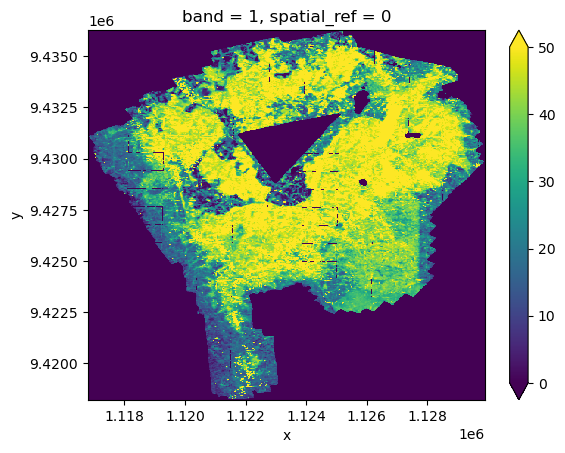

In [54]:
xds = rioxarray.open_rasterio('../result_chm/amani.tif')
import matplotlib.pyplot as plt 
#plt.figure(figsize =(10, 10))
xds[0].plot(vmin=0,vmax=50)
#plt.xlim(1.124*1e6, 1.125*1e6)
#plt.ylim(9.424*1e6, 9.428*1e6)

In [42]:
files = glob.glob('/gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/ease1km_tile/chm_1km/*.tif')

In [43]:
xds = rioxarray.open_rasterio(files[1])

In [47]:
xds

<xarray.DataArray (band: 1, y: 36, x: 48)>
[1728 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 1.124e+06 1.124e+06 ... 1.125e+06 1.125e+06
  * y            (y) float64 9.435e+06 9.435e+06 ... 9.435e+06 9.435e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:     Area
    TIFFTAG_ARTIST:    created by LAStools (c) martin.isenburg@rapidlasso.com
    TIFFTAG_SOFTWARE:  LAStools is a product of rapidlasso GmbH, Germany
    _FillValue:        -9999.0
    scale_factor:      1.0
    add_offset:        0.0

In [48]:
df = xds[0].to_dataframe(name='h_als')['h_als']

In [53]:
df[df > 0].describe()

count    1587.000000
mean       41.432312
std        12.832656
min         6.150000
25%        32.254999
50%        43.119999
75%        50.195000
max       100.589996
Name: h_als, dtype: float64

In [26]:
import glob, os
def get_easeids():
    files = glob.glob('/gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/ease1km_tile/thin/*.laz')
    ids = []
    for file in files:
        bs = os.path.basename(file) # X21080Y07964
        ids.append(bs[:12])
    return list(set(ids))


- min x y z:                  1121250.00 9418238.66 280.77
- max x y z:                  1121999.99 9418499.99 954.47

- min x y z:                  1122000.00 9418273.08 331.20-  max x y z:                  1122284.86 9418499.99 1013.52

In [98]:
'0157_0000002.laz'[:4]

'0157'

In [4]:
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
import matplotlib.pyplot as plt

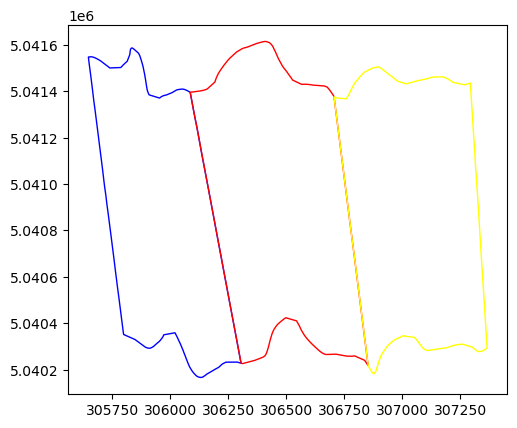

In [15]:
# Replace 'your_shapefile.shp' with the path to your shapefile
shapefile_path = '../tmp_test/test_neon_1.shp'
# Read the shapefile
gdf1 = gpd.read_file('../tmp_test/test_neon_1.shp')
gdf2 = gpd.read_file('../tmp_test/test_neon_2.shp')
gdf3 = gpd.read_file('../tmp_test/test_neon_3.shp')
# Create a plot
fig, ax = plt.subplots()

# Plot the first GeoDataFrame
gdf1.plot(ax=ax, facecolor='none',  edgecolor='blue')

# Plot the second GeoDataFrame
gdf2.plot(ax=ax, facecolor='none', edgecolor='red')

gdf3.plot(ax=ax, facecolor='none', edgecolor='yellow')

# Display the plot
plt.show()

<Axes: >

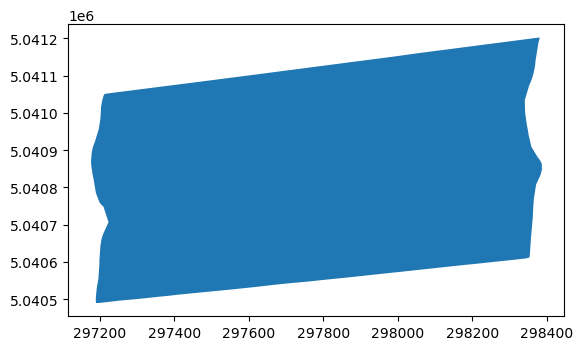

In [69]:
import glob
import pandas as pd
# List of shapefile paths to merge
shapefile_paths = glob.glob('/gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/lasboundary/usa/neon_stei2022/*.shp')
gdf1= gpd.read_file(shapefile_paths[0])
gdf1.plot()

In [70]:
# Read the shapefiles into GeoDataFrames
gdfs = [gpd.read_file(shp) for shp in shapefile_paths]

<Axes: >

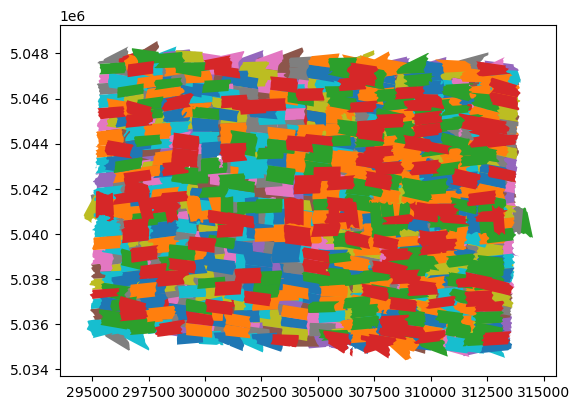

In [75]:
for i, gdf in enumerate(gdfs):
    gdf['source'] = f'shapefile_{i+1}'
merged_gdf = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True))
merged_gdf.plot(column='source') # ,  facecolor='none'

In [74]:
merged_gdf.shape

(1537, 2)

In [76]:
# get new chm 

In [78]:
files = glob.glob('../result/ease1km_tile/classified/*.laz')
for f in files[:2]:
    out_norm = '../result/ease1km_tile' + '/norm/' + os.path.basename(f)[:-4] + '_norm.laz'
    if not os.path.exists(out_norm):
        cmd=f'wine $LASTOOLS/lasheight.exe -i {f} -drop_above 150 -replace_z -o {out_norm}'
        print(cmd)
        os.system(cmd)

wine $LASTOOLS/lasheight.exe -i ../result/ease1km_tile/classified/X21074Y07967tile_1121500_9425000_classified.laz -drop_above 150 -replace_z -o ../result/ease1km_tile/norm/X21074Y07967tile_1121500_9425000_classified_norm.laz
wine $LASTOOLS/lasheight.exe -i ../result/ease1km_tile/classified/X21075Y07967tile_1123500_9425500_classified.laz -drop_above 150 -replace_z -o ../result/ease1km_tile/norm/X21075Y07967tile_1123500_9425500_classified_norm.laz


sh: line 1: wine: command not found
sh: line 1: wine: command not found


# check folders 

In [62]:
import geopandas 
gdf = geopandas.read_parquet('../data/all_sites_20240703.parquet')
print(gdf[gdf['name'] == 'amani'])

        region   name       area_ha   epsg  \
164985  africa  amani  5.618853e+01  32736   
164986  africa  amani  5.610737e+01  32736   
164987  africa  amani  5.618320e+01  32736   
164988  africa  amani  4.130606e+01  32736   
164989  africa  amani  5.999298e-06  32736   
...        ...    ...           ...    ...   
165835  africa  amani  5.613780e+01  32736   
165836  africa  amani  2.497943e-07  32736   
165837  africa  amani  5.612227e+01  32736   
165838  africa  amani  5.620915e+01  32736   
165839  africa  amani  5.297458e+01  32736   

                                                 geometry  \
164985  POLYGON ((38.62334 -5.12073, 38.63002 -5.12073...   
164986  POLYGON ((38.63014 -5.12742, 38.63681 -5.12742...   
164987  POLYGON ((38.65028 -5.12049, 38.65695 -5.12049...   
164988  POLYGON ((38.60420 -5.16141, 38.61018 -5.16141...   
164989  POLYGON ((38.65042 -5.13698, 38.65042 -5.13698...   
...                                                   ...   
165835  POLYGON ((38

In [59]:
list = gdf['name'].unique()

In [60]:
list[1]

'plumasnf_20180707'

In [80]:
t = '/gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/ease1km_tile/asia/khaoyai_thailand/tile_gpkg/X27124Y05494.gpkg'
out_dir = os.path.split(os.path.dirname(t))[0] + '/laz_500m_buffer'
out_laz_tile =  out_dir + '/' + os.path.basename(out_laz)[:-4] + 'tile.laz'

In [86]:
os.path.dirname(t)

'/gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/ease1km_tile/asia/khaoyai_thailand/tile_gpkg'

In [82]:
out_dir

'/gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/ease1km_tile/asia/khaoyai_thailand/laz_500m_buffer'

In [72]:
os.path.split(out_dir)

('/gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/ease1km_tile/asia/khaoyai_thailand',
 'laz_1km')

In [84]:
out_dir = os.path.split(os.path.dirname(t))[0] +  '/laz_1km'
out_laz = out_dir+ '/' + os.path.basename(t)[:-5] + '.laz'

In [85]:
out_laz

'/gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/ease1km_tile/asia/khaoyai_thailand/laz_1km/X27124Y05494.laz'

In [94]:
files = glob.glob('/gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/ease1km_tile/*/*/thin/*.laz')
ids = []
for file in files:
    bs = os.path.basename(file) # X21080Y07964
    id = os.path.dirname(file) + '/'+bs[:12]
    if id not in ids:
        ids.append(id)


In [95]:
len(ids)

162

In [91]:
len(ids)

1271

In [93]:
ids[1]

'/gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/ease1km_tile/africa/amani/thin/X21076Y07962'

In [96]:
files = glob.glob(ids[1]+'*.laz')
out_tif = ids[1].replace('/thin/', '/chm_1km/') + '.tif'

In [98]:
files

['/gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/ease1km_tile/africa/amani/thin/X21076Y07962tile_1124500_9430000_classified_norm_thin.laz',
 '/gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/ease1km_tile/africa/amani/thin/X21076Y07962tile_1123500_9429000_classified_norm_thin.laz',
 '/gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/ease1km_tile/africa/amani/thin/X21076Y07962tile_1124000_9430000_classified_norm_thin.laz',
 '/gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/ease1km_tile/africa/amani/thin/X21076Y07962tile_1123500_9430000_classified_norm_thin.laz',
 '/gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/ease1km_tile/africa/amani/thin/X21076Y07962tile_1124500_9429500_classified_norm_thin.laz',
 '/gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/ease1km_tile/africa/amani/thin/X21076Y07962tile_1123500_9429500_classified_norm_thin.laz',
 '/gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/ease1km_tile/africa/amani/thin/X21076Y07962tile_1124000_9429500_classified_norm_thin.laz',
 '/gpf

In [99]:
import rioxarray


(1598500.0, 1599500.0)

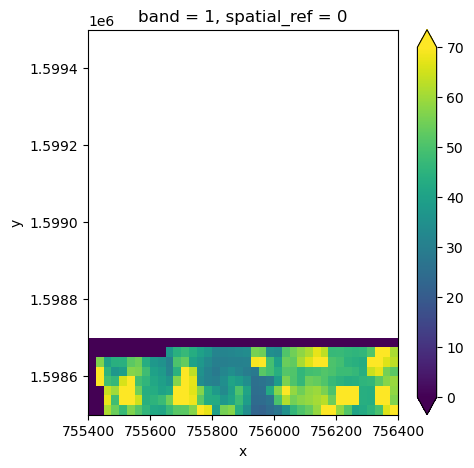

In [105]:
xds = rioxarray.open_rasterio('/gpfs/data1/vclgp/xiongl/ProjectIS2CalVal/result/ease1km_tile/asia/khaoyai_thailand/chm_1km/X27125Y05486.tif')
import matplotlib.pyplot as plt 
plt.figure(figsize =(5, 5))
xds[0].plot(vmin=0,vmax=70)
plt.xlim(755400, 756400)
plt.ylim(1598500, 1599500)